# Exercise 3
Scale-free networks and networks attacks

In [1]:
import warnings
warnings.filterwarnings("ignore")
import networkx as nx
import math as math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Scale-free networks.

Generate a scale-free network with $10000$ edges and add $10$ nodes in each
step (use the method *barabasi_albert_ graph(n, m)*). 

Calculate the values of $L$, $C$ and the degree distribution of the nodes. 

Generate a random network that has the same number of nodes and branches as the network that you have created.

Calculate your values of $L$, $C$ and the degree distribution of the nodes and compare the values
obtained.

### L & C

In [2]:
def get_graph_metrics(graph):
    largest_cc = max(nx.connected_components(graph), key=len)   
    largest_connected_subgraph = graph.subgraph(largest_cc)
    if not nx.is_connected(graph): 
        subgraph = largest_connected_subgraph
    else:
        subgraph = graph
    return nx.average_clustering(graph),\
           nx.average_shortest_path_length(subgraph),\
           largest_connected_subgraph.order()
    
def l_c_random(n_graph, n, p):
    acum_c = 0
    acum_l = 0
    acum_o = 0
    for i in range(0, n_graph):
        graph = nx.gnp_random_graph(n, p)
        c, l, o = get_graph_metrics(graph)
        acum_c += c
        acum_l += l
        acum_o += o
    return [acum_c/n_graph, acum_l/n_graph, acum_o/n_graph]

In [3]:
order = 10000
edges = 10
graph_free_scale_barabasi = nx.barabasi_albert_graph(order, edges)
c, l, o = get_graph_metrics(graph_free_scale_barabasi)

In [6]:
print(c, l, o)
# Result : 0.011121720734477772 3.0628272427242726 10000

0.011121720734477772 3.0628272427242726 10000


In [4]:
print("Free scale graph size:", graph_free_scale_barabasi.size())
graph_random = nx.gnm_random_graph(order, graph_free_scale_barabasi.size())
c_random, l_random, o_random = get_graph_metrics(graph_random)

d = {'Free Scale': [c, l], 'Random': [c_random, l_random]}
df = pd.DataFrame(data=d, index = ['Average clustering',
                                   'Average shortest path length'])
df

Free scale graph size: 99900


,Free Scale,Random
Average clustering,0.011050,0.001928
Average shortest path length,3.062604,3.403116


### Node degree distribution

Plot by curves.

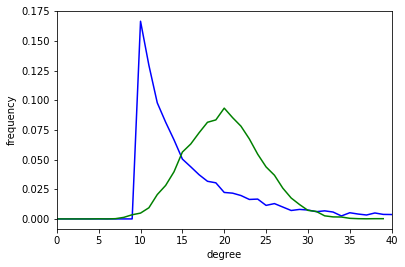

In [14]:
plt.xlabel('degree')
plt.ylabel('frequency')
plt.xlim(0, 40)

his = nx.degree_histogram(graph_free_scale_barabasi)
plt.plot([i/order for i in his], color='g')
his_al = nx.degree_histogram(graph_random)
plt.grid()
plt.plot([i/order for i in his_al], color='b');


Another plot

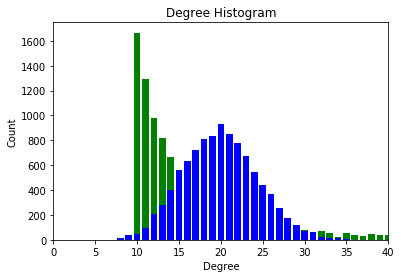

In [18]:
# Another way
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.xlim(0, 40)
L = nx.degree_histogram(graph_free_scale_barabasi)
plt.bar(range(len(L)),L, width=0.80, color='g')
L = nx.degree_histogram(graph_random)
plt.bar(range(len(L)),L, width=0.80, color='b')
plt.show()

### Results Comparison

## Network Attack.

### Random attack

Implement a routine program random_attack $(G, m)$ in Python that perform a random attack on $m$ nodes of graph $G$.

Use the previous routine to calculate the size of the largest connected component
connected in random, small world and scale-free graphs of $1000$ nodes and $4000$ branches after attacks of 10%, 30%, 50%, 70% and 90% of the nodes of the graph.

Removing 3 nodes


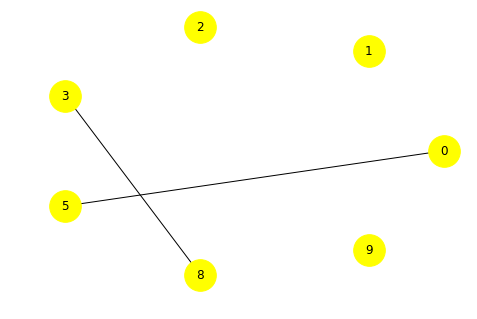

In [17]:
import random
def random_attack(graph, m):
    """
    """
    print("Removing %s nodes" % (m))
    for remove in range(0,m):
        node = random.choice(list(graph.nodes))
        graph.remove_node(node)

    return graph

def random_attack_percent(graph, percent_nodes_attacked):
    """
    """
    m = graph.order() * percent_nodes_attacked / 100
    return random_attack(graph, round(m))

n = 10
e = 4
percent_nodes_attacked = 30
graph = nx.gnm_random_graph(n, e)
graph_attacked = random_attack_percent(graph, percent_nodes_attacked)
nx.draw_circular(graph_attacked, with_labels = True, node_color = "yellow", node_size = 1000)

In [47]:
def node_attack(initial_graph, percents_nodes_attacked):
    """
    """
    sizes_max_connected_subgraph = []
    for percent_nodes_attacked in percents_nodes_attacked:
        print("Attacking %s nodes" % (percent_nodes_attacked))
        graph = initial_graph.copy()
        attacked_graph = random_attack_percent(graph, percent_nodes_attacked)
        largest_cc = max(nx.connected_components(attacked_graph), key=len) 
        largest_connected_subgraph = attacked_graph.subgraph(largest_cc)
        sizes_max_connected_subgraph.append(largest_connected_subgraph.size())
    return sizes_max_connected_subgraph
        

percents_nodes_attacked = [10, 30, 50, 70, 90]
n = 10
e = 40

graph_random = nx.gnm_random_graph(n, e)
random_size = node_attack(graph_random, percents_nodes_attacked)
print(random_size)

graph_scale_free = nx.barabasi_albert_graph(n, min(n, e) - 1)
free_scale_size = node_attack(graph_scale_free, percents_nodes_attacked)
print(free_scale_size)

k = int(e*2/n)
p = 0.3
graph_small_world = nx.watts_strogatz_graph(n, k, p, 0)
small_world_size = node_attack(graph_scale_free, percents_nodes_attacked)
print(small_world_size)

d = {'Random': random_size, 'Small-World': small_world_size, 'Scale-Free': free_scale_size}
df = pd.DataFrame(data=d, index = [str(i)+'%' for i in percents_nodes_attacked])
df


Attacking 10 nodes
Removing 1 nodes
Attacking 30 nodes
Removing 3 nodes
Attacking 50 nodes
Removing 5 nodes
Attacking 70 nodes
Removing 7 nodes
Attacking 90 nodes
Removing 9 nodes
[31, 20, 9, 2, 0]
Attacking 10 nodes
Removing 1 nodes
Attacking 30 nodes
Removing 3 nodes
Attacking 50 nodes
Removing 5 nodes
Attacking 70 nodes
Removing 7 nodes
Attacking 90 nodes
Removing 9 nodes
[8, 0, 4, 0, 0]
Attacking 10 nodes
Removing 1 nodes
Attacking 30 nodes
Removing 3 nodes
Attacking 50 nodes
Removing 5 nodes
Attacking 70 nodes
Removing 7 nodes
Attacking 90 nodes
Removing 9 nodes
[8, 6, 0, 2, 0]


,Random,Small-World,Scale-Free
10%,31,8,8
30%,20,6,0
50%,9,0,4
70%,2,2,0
90%,0,0,0


1000 4000 8
4000


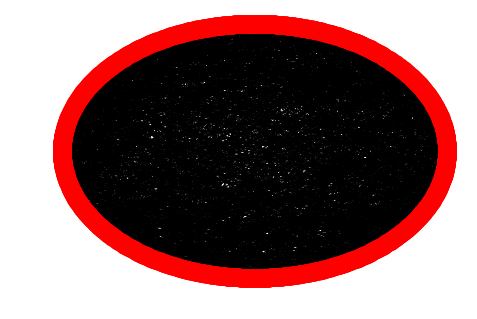

In [42]:
n = 1000
e = 4000
k = int(e*2/n)
print (n , e, k)
g = nx.watts_strogatz_graph(n, k, 0.5, 0)
print(g.size())
nx.draw_circular(g)

### Attack degrees

Implement a method *degree_attack(G, m)* in Python that performs an attack based on degrees to $m$ nodes of graph $G$.

Use the previous routine to calculate the size of the largest connected component in random, small world and scale-free graphs of $1000$ nodes and $4000$ branches after attacks of 10%, 30%, 50%, 70% and 90% of the nodes.

### Comparisons
Compare the result obtained in the two previous sections.